In [1]:
import time
import math
from datetime import timedelta

In [2]:
from xiaonet import *

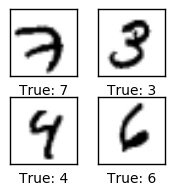

In [3]:
# load the complete MNIST dataset
from xiaoloader import load_mnist
dataset = load_mnist()

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

images = dataset.train.images[0:4]
labels = np.array([label.argmax() for label in dataset.train.labels[0:4]])
plot_images(images, labels) # MNIST are 28 x 28

In [4]:
BATCH_SIZE = 250

EPOCHS = 4

M = 784 # 28 x 28 pixels

N = 512 # hidden neurons

P = 10 # number of possible classes

steps = len(dataset.train.images) // BATCH_SIZE # 220 steps

w1 = np.random.normal(0.0, pow(10, -0.5), (BATCH_SIZE, M, N))

w2 = np.random.normal(0.0, pow(10, -0.5), (BATCH_SIZE, N, P))

b1 = np.random.normal(0.0, pow(10, -0.5), (BATCH_SIZE, N))

b2 = np.random.normal(0.0, pow(10, -0.5), (BATCH_SIZE, P))

In [5]:
def equal(y_predicted, y_true):
    
    total = 0
    
    for j in range(BATCH_SIZE):
        if np.argmax(y_predicted[j]) == np.argmax(y_true[j]):
            total += 1
            
    return total

def eval_data(dataset):
    """
    Given a dataset as input returns the loss and accuracy.
    """
    steps_per_epoch = dataset.num_examples // BATCH_SIZE

    num_examples = steps_per_epoch * BATCH_SIZE

    total_acc, total_loss = 0, 0
    
    for step in range(steps_per_epoch):
    
        batch_x, batch_y = dataset.next_batch(BATCH_SIZE)
        
        total_loss += train_SGD({x: batch_x}, batch_y, [w1, b1, w2, b2])
        
        total_acc += equal(g.value, batch_y)

    return total_loss/num_examples, total_acc*100/num_examples

In [6]:
def train_data():
    
    start_time = time.time()

    steps = dataset.train.num_examples // BATCH_SIZE
    
    for i in range(EPOCHS):

        for step in range(steps):
        
            batch_x, batch_y = dataset.train.next_batch(BATCH_SIZE)
        
            train_SGD({x: batch_x}, batch_y, [w1, b1, w2, b2])

        val_loss, val_acc = eval_data(dataset.validation)
        
        msg = "EPOCH {} ... Validation loss = {}, Validation accuracy = {}%"
        print(msg.format(i+1, val_loss, val_acc))
    
    time_dif = time.time() - start_time

    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))

In [7]:
x = Input(w1, b1)

h = Hidden(x, w2, b2)

# r = Relu(h)

# h = Hidden(r, w2, b2)

g = Softmax(h)

cost = CrossEntropy(g) # numpy.mean(CrossEntropy) over BATCH SIZE

print("beginning training\n")
train_data()

beginning training

EPOCH 1 ... Validation loss = 0.12801770217298866, Validation accuracy = 10.36%
EPOCH 2 ... Validation loss = 0.12893329311275625, Validation accuracy = 10.36%
EPOCH 3 ... Validation loss = 0.1286522747955876, Validation accuracy = 9.46%
EPOCH 4 ... Validation loss = 0.1297848246554159, Validation accuracy = 10.02%
Time usage: 0:02:04


In [8]:
# Evaluate on the test data
test_loss, test_acc = eval_data(dataset.test)
print("\nTest loss = {}".format(test_loss))
print("Test accuracy = {}".format(test_acc))


Test loss = 0.1315336948251015
Test accuracy = 9.38


In [44]:
def plot_images(images, labels, pred_labels=None):
    #assert len(images) == len(labels) == 5
    
    # Create figure with 2x2 sub-plots.
    fig, axes = plt.subplots(2, 2, figsize=(2,2))
    fig.subplots_adjust(hspace=1, wspace=1.9)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape((28, 28)), cmap='binary')

        # Show true and predicted classes.
        if pred_labels is None:
            xlabel = "True: {0}".format(labels[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(labels[i], pred_labels[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

In [10]:
def plot_example_predictions(predicted):

    labels = np.array([label.argmax() for label in dataset.test.labels[10:14]])
    
    pred = np.array([label[1].argmax() for label in predicted])
    
    images = dataset.test.images[10:14]
    
    plot_images(images,labels, pred_labels=pred)

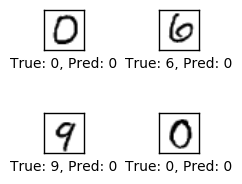

In [11]:
plot_example_predictions(g.value)

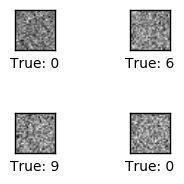

In [45]:
images = np.array([img[:,0] for img in w1[0:4]])
labels = np.array([label.argmax() for label in dataset.test.labels[10:14]])
plot_images(images,labels)